<a href="https://colab.research.google.com/github/PallaviVangari/DataMiningAssignment5/blob/main/TabularData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = "/content/sample_data/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows of the dataset
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Data Exploration

# Checking for missing values
missing_values = iris_data.isnull().sum()

# Checking data types of each column
data_types = iris_data.dtypes

# Checking for duplicate rows
duplicate_rows = iris_data.duplicated().sum()

# Getting a summary of the dataset
summary = iris_data.describe(include='all')

missing_values, data_types, duplicate_rows, summary


(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 species          object
 dtype: object,
 3,
         sepal_length  sepal_width  petal_length  petal_width      species
 count     150.000000   150.000000    150.000000   150.000000          150
 unique           NaN          NaN           NaN          NaN            3
 top              NaN          NaN           NaN          NaN  Iris-setosa
 freq             NaN          NaN           NaN          NaN           50
 mean        5.843333     3.054000      3.758667     1.198667          NaN
 std         0.828066     0.433594      1.764420     0.763161          NaN
 min         4.300000     2.000000      1.000000     0.100000          NaN
 25%         5.100000     2.800000      1.600000     0.300000          NaN
 50%         5.800000     3.000000      4.350000     1.300000         

In [8]:
# Data Cleaning

# Removing duplicate rows
iris_data_cleaned = iris_data.drop_duplicates()

# Checking the shape of the dataset before and after removing duplicates
shape_before = iris_data.shape
shape_after = iris_data_cleaned.shape

shape_before, shape_after


((150, 5), (147, 5))

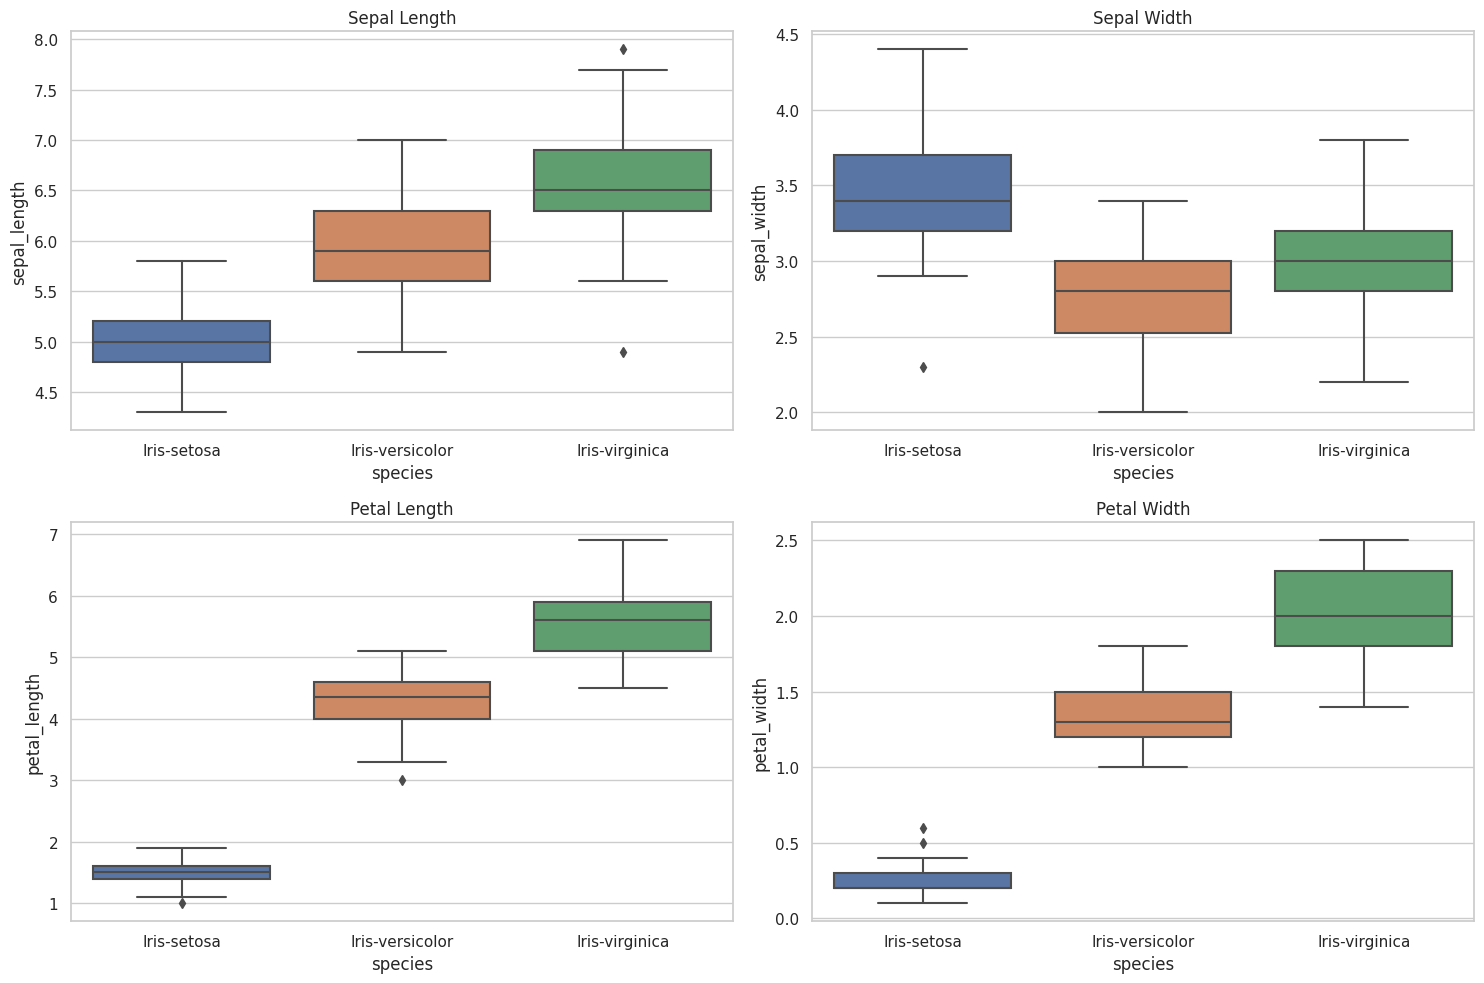

In [9]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting boxplots for each numeric column to check for outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], x='species', y='sepal_length', data=iris_data_cleaned)
axes[0, 0].set_title('Sepal Length')

sns.boxplot(ax=axes[0, 1], x='species', y='sepal_width', data=iris_data_cleaned)
axes[0, 1].set_title('Sepal Width')

sns.boxplot(ax=axes[1, 0], x='species', y='petal_length', data=iris_data_cleaned)
axes[1, 0].set_title('Petal Length')

sns.boxplot(ax=axes[1, 1], x='species', y='petal_width', data=iris_data_cleaned)
axes[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()


<ipython-input-10-0820731635ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = series.median()
<ipython-input-10-0820731635ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = series.median()
<ipython-input-10-0820731635ef>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_cleaned['sepal_width'] = replace_outliers(iris_data_clea

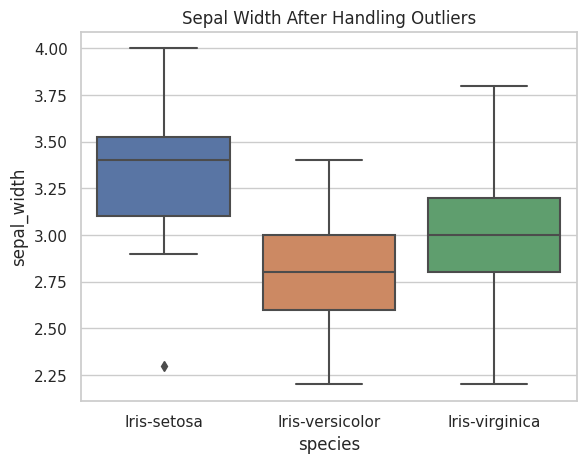

In [10]:
# Handling outliers in 'sepal_width'

# Defining a function to replace outliers with the median
def replace_outliers(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    outliers = ((series < lower_bound) | (series > upper_bound))
    series[outliers] = series.median()
    return series

# Replacing outliers in 'sepal_width' with the median
iris_data_cleaned['sepal_width'] = replace_outliers(iris_data_cleaned['sepal_width'])

# Checking for outliers after handling
sns.boxplot(x='species', y='sepal_width', data=iris_data_cleaned)
plt.title('Sepal Width After Handling Outliers')
plt.show()


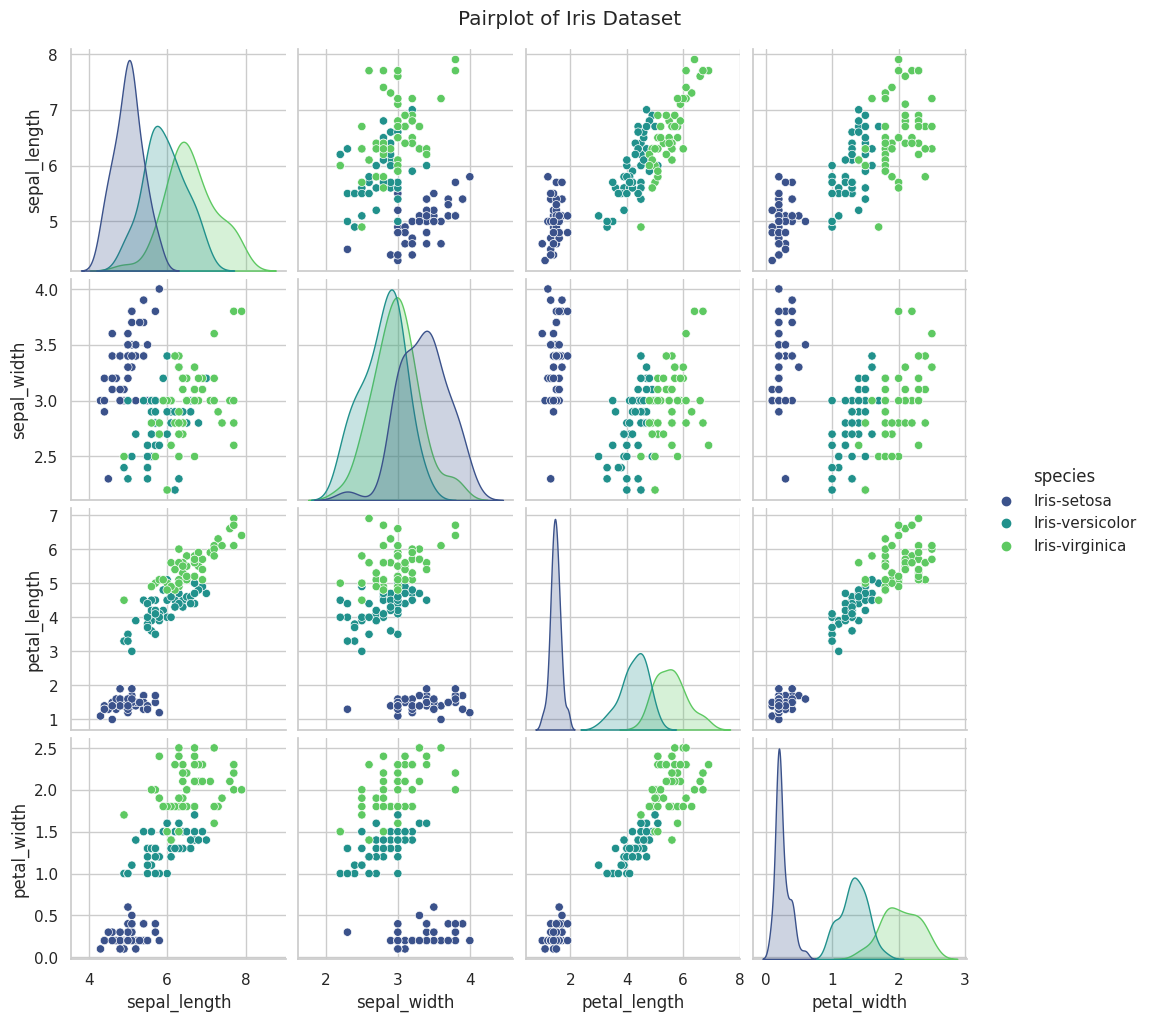

In [11]:
# Visualization

# Pairplot to visualize the relationships between features and the target variable
sns.pairplot(iris_data_cleaned, hue='species', palette='viridis', height=2.5)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-c7fa670f1d1e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_cleaned['cluster'] = kmeans.labels_


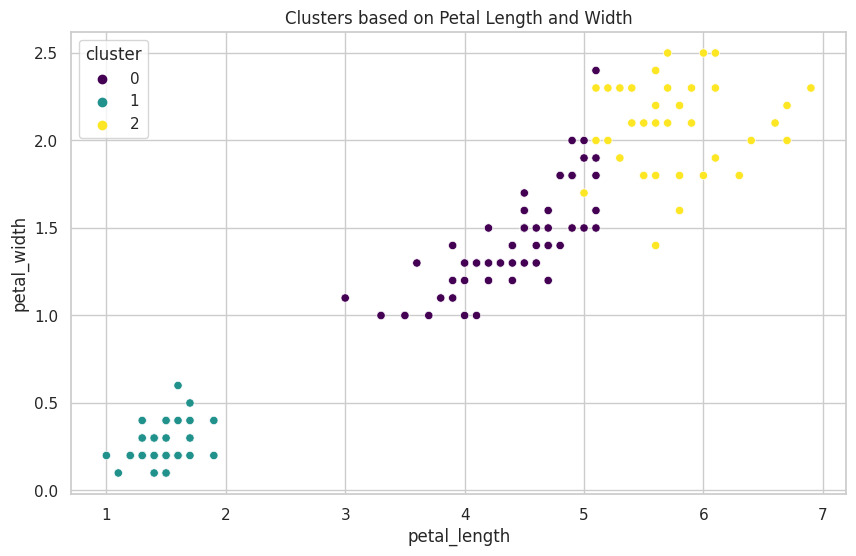

In [12]:
# Importing necessary libraries for clustering
from sklearn.cluster import KMeans

# Extracting the features for clustering
X = iris_data_cleaned.iloc[:, :-1]

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Adding the cluster labels to the dataset
iris_data_cleaned['cluster'] = kmeans.labels_

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', palette='viridis', data=iris_data_cleaned, ax=ax)
ax.set_title('Clusters based on Petal Length and Width')
plt.show()


<ipython-input-13-fa2b4d134763>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_cleaned['outlier'] = outliers


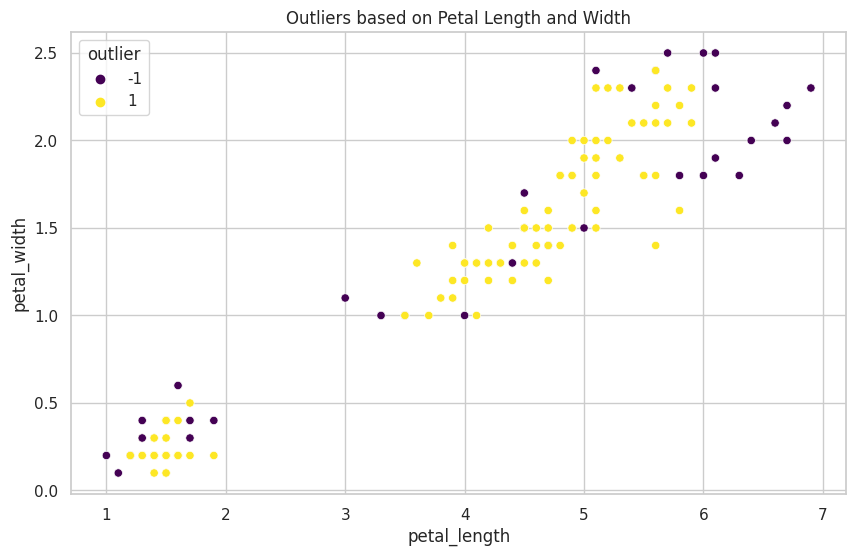

In [13]:
# Importing necessary libraries for anomaly detection
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
isolation_forest = IsolationForest(random_state=0)
outliers = isolation_forest.fit_predict(X)

# Adding the outlier labels to the dataset
iris_data_cleaned['outlier'] = outliers

# Visualizing the outliers
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='petal_length', y='petal_width', hue='outlier', palette='viridis', data=iris_data_cleaned, ax=ax)
ax.set_title('Outliers based on Petal Length and Width')
plt.show()


In [14]:
from autogluon.tabular import TabularPredictor
import pandas as pd

data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

from h2o.automl import H2OAutoML

predictor = TabularPredictor(label='species').fit(train_data)

performance = predictor.evaluate(test_data)

from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load("AutogluonModels/ag-20231029_221629")

# This part of code is executed in local


ModuleNotFoundError: ignored